<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Natural Language Processing (NLP)
## *Data Science Unit 4 Sprint 1 Assignment 1*

Your goal in this assignment: find the attributes of the best & worst coffee shops in the dataset. The text is fairly raw: dates in the review, extra words in the `star_rating` column, etc. You'll probably want to clean that stuff up for a better analysis. 

Analyze the corpus of text using text visualizations of token frequency. Try cleaning the data as much as possible. Try the following techniques: 
- Lemmatization
- Custom stopword removal

Keep in mind the attributes of good tokens. Once you have a solid baseline, layer in the star rating in your visualization(s). Key part of this assignment - produce a write-up of the attributes of the best and worst coffee shops. Based on your analysis, what makes the best the best and the worst the worst. Use graphs and numbesr from your analysis to support your conclusions. There should be plenty of markdown cells! :coffee:

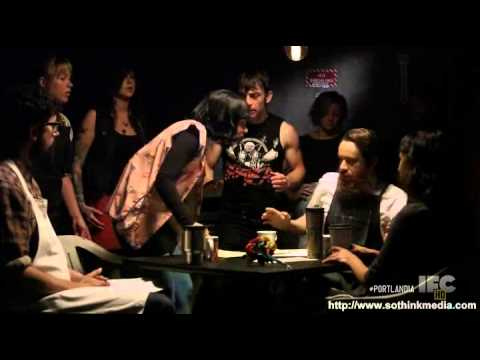

In [5]:
from IPython.display import YouTubeVideo

YouTubeVideo('Jml7NVYm8cs')

In [2]:
%pwd

'/Users/jonathansokoll/Documents/lambda/DS-Unit-4-Sprint-1-NLP/module1-text-data'

In [1]:
import pandas as pd

url = "https://raw.githubusercontent.com/LambdaSchool/DS-Unit-4-Sprint-1-NLP/master/module1-text-data/data/yelp_coffeeshop_review_data.csv"

shops = pd.read_csv(url)
shops.head()

,coffee_shop_name,full_review_text,star_rating
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating


In [2]:
shops.dtypes

coffee_shop_name    object
full_review_text    object
star_rating         object
dtype: object

In [3]:
shops['coffee_shop_name'].value_counts()

Epoch Coffee                            400
Halcyon                                 300
The Factory - Cafe With a Soul          244
Houndstooth Coffee                      200
Venezia Italian Gelato                  200
Caffé Medici                            143
Apanas Coffee & Beer                    136
Strange Brew, Austin Coffee             100
Caffe Medici                            100
Jo’s Coffee                             100
Genuine Joe                             100
Anderson’s Coffee Company               100
Mary’s Cafe                             100
Seventh Flag Coffee Co                  100
Russell’s Bakery                        100
La Tazza Fresca                         100
Tea Haus                                100
Stinson’s                               100
La Patisserie                           100
Lola Savannah Coffee Lounge             100
Cenote                                  100
Monkey Nest Coffee                      100
Café Java                       

In [4]:
datatime = shops['full_review_text'].str.split(" ",2).str[1]

In [5]:
shops['full_review_text'] = shops['full_review_text'].str.split(" ",2).str[2]

In [6]:
shops['full_review_text']

0       1 check-in Love love loved the atmosphere! Eve...
1       Listed in Date Night: Austin, Ambiance in Aust...
2       1 check-in Listed in Brunch Spots I loved the ...
3       Very cool decor! Good drinks Nice seating  How...
4       1 check-in They are located within the Northcr...
5       1 check-in Very cute cafe! I think from the mo...
6       2 check-ins Listed in "Nuptial Coffee Bliss!",...
7       2 check-ins Love this place!  5 stars for clea...
8       1 check-in Ok, let's try this approach...  Pro...
9       3 check-ins This place has been shown on my so...
10      1 check-in Listed in Americano This is not you...
11      The store has A+ decoration, but honestly, the...
12      1 check-in Listed in 2016 - The Third Time is ...
13      This is such a cute little cafe! I've driven b...
14      Beautiful eccentric coffee shop with a library...
15      1 check-in Listed in In Search of Fantastic Co...
16      Really love the atmosphere here! I frequent co...
17      1 chec

In [7]:
shops['star_rating']=shops['star_rating'].astype(str).str[1]

In [8]:
shops['star_rating']

0       5
1       4
2       4
3       2
4       4
5       4
6       4
7       5
8       3
9       5
10      4
11      3
12      3
13      5
14      5
15      5
16      5
17      4
18      4
19      4
20      5
21      5
22      4
23      5
24      5
25      1
26      5
27      5
28      5
29      5
       ..
7586    4
7587    4
7588    5
7589    5
7590    3
7591    5
7592    4
7593    4
7594    5
7595    4
7596    5
7597    4
7598    5
7599    5
7600    2
7601    4
7602    4
7603    4
7604    4
7605    5
7606    4
7607    5
7608    4
7609    4
7610    5
7611    4
7612    5
7613    4
7614    3
7615    4
Name: star_rating, Length: 7616, dtype: object

In [9]:
shops['star_rating']=shops['star_rating'].astype(int)
shop_good=shops[shops['star_rating']>=4]

In [27]:
shop_bad=shops[shops['star_rating']<4]

In [28]:
# Start here 
import spacy
from spacy.tokenizer import Tokenizer
nlp = spacy.load("en_core_web_lg")

# Tokenizer
tokenizer = Tokenizer(nlp.vocab)

## How do we want to analyze these coffee shop tokens? 

- Overall Word / Token Count
- View Counts by Rating 
- *Hint:* a 'bad' coffee shops has a rating betweeen 1 & 3 based on the distribution of ratings. A 'good' coffee shop is a 4 or 5. 

In [29]:
STOP_WORDS = nlp.Defaults.stop_words.union(["1","i've","it's","don't","i've","i'm"])

In [30]:
tokens = []

""" Update those tokens w/o stopwords"""
for doc in tokenizer.pipe(shop_good['full_review_text'], batch_size=500):
    
    doc_tokens = []
    
    for token in doc:
        if (token.text.lower() not in STOP_WORDS) & (token.is_punct == False) & (token.is_space == False):
            doc_tokens.append(token.text.lower())

    tokens.append(doc_tokens)

shop_good['tokens'] = tokens

/Users/huanqingxu/opt/anaconda3/envs/U4-S1-NLP/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [31]:
shop_good['tokens'].head()

0    [check-in, love, love, loved, atmosphere!, cor...
1    [listed, date, night:, austin,, ambiance, aust...
2    [check-in, listed, brunch, spots, loved, eclec...
4    [check-in, located, northcross, mall, shopping...
5    [check-in, cute, cafe!, think, moment, stepped...
Name: tokens, dtype: object

In [32]:
from collections import Counter

In [33]:
def count(docs):

        word_counts = Counter()
        appears_in = Counter()
        
        total_docs = len(docs)

        for doc in docs:
            word_counts.update(doc)
            appears_in.update(set(doc))

        temp = zip(word_counts.keys(), word_counts.values())
        
        wc = pd.DataFrame(temp, columns = ['word', 'count'])

        wc['rank'] = wc['count'].rank(method='first', ascending=False)
        total = wc['count'].sum()

        wc['pct_total'] = wc['count'].apply(lambda x: x / total)
        
        wc = wc.sort_values(by='rank')
        wc['cul_pct_total'] = wc['pct_total'].cumsum()

        t2 = zip(appears_in.keys(), appears_in.values())
        ac = pd.DataFrame(t2, columns=['word', 'appears_in'])
        wc = ac.merge(wc, on='word')

        wc['appears_in_pct'] = wc['appears_in'].apply(lambda x: x / total_docs)
        
        return wc.sort_values(by='rank')

In [34]:
wc_good = count(shop_good['tokens'])

In [35]:
wc_good.head(100)

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
42,coffee,3383,6421,1.0,0.021653,0.021653,0.550977
138,place,2432,3389,2.0,0.011428,0.033082,0.396091
72,great,2174,2902,3.0,0.009786,0.042868,0.354072
336,good,1643,2180,4.0,0.007351,0.050219,0.267590
247,like,1486,2068,5.0,0.006974,0.057193,0.242020
19,love,1263,1604,6.0,0.005409,0.062602,0.205700
13,check-in,1598,1602,7.0,0.005402,0.068004,0.260261
597,little,1027,1230,8.0,0.004148,0.072152,0.167264
214,nice,962,1101,9.0,0.003713,0.075865,0.156678
366,best,951,1093,10.0,0.003686,0.079551,0.154886


In [36]:
tokens = []

""" Update those tokens w/o stopwords"""
for doc in tokenizer.pipe(shop_bad['full_review_text'], batch_size=500):
    
    doc_tokens = []
    
    for token in doc:
        if (token.text.lower() not in STOP_WORDS) & (token.is_punct == False) & (token.is_space == False):
            doc_tokens.append(token.text.lower())

    tokens.append(doc_tokens)

shop_bad['tokens'] = tokens

/Users/huanqingxu/opt/anaconda3/envs/U4-S1-NLP/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [37]:
shop_bad['tokens'].head()

3     [cool, decor!, good, drinks, nice, seating, ho...
8     [check-in, ok,, let's, try, approach..., pros:...
11    [store, a+, decoration,, honestly,, coffee, go...
12    [check-in, listed, 2016, time, charm!, factory...
25    [okay,, visiting, friends, la, trying, mint, m...
Name: tokens, dtype: object

In [38]:
wc_bad = count(shop_bad['tokens'])

In [39]:
wc_bad.head(100)

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
7,coffee,827,1637,1.0,0.019398,0.019398,0.560298
150,place,597,875,2.0,0.010369,0.029767,0.404472
33,like,548,834,3.0,0.009883,0.039650,0.371274
20,good,441,599,4.0,0.007098,0.046748,0.298780
54,food,266,369,5.0,0.004373,0.051120,0.180217
53,check-in,359,359,6.0,0.004254,0.055375,0.243225
256,time,264,351,7.0,0.004159,0.059534,0.178862
182,pretty,278,349,8.0,0.004136,0.063669,0.188347
52,great,264,348,9.0,0.004124,0.067793,0.178862
528,people,247,327,10.0,0.003875,0.071668,0.167344


## Can visualize the words with the greatest difference in counts between 'good' & 'bad'?

Couple Notes: 
- Rel. freq. instead of absolute counts b/c of different numbers of reviews
- Only look at the top 5-10 words with the greatest differences


In [40]:
import squarify
import matplotlib.pyplot as plt

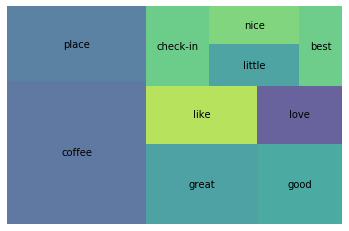

In [41]:
wc_good_top10 = wc_good[wc_good['rank'] <= 10]

squarify.plot(sizes=wc_good_top10['pct_total'], label=wc_good_top10['word'], alpha=.8 )
plt.axis('off')
plt.show()

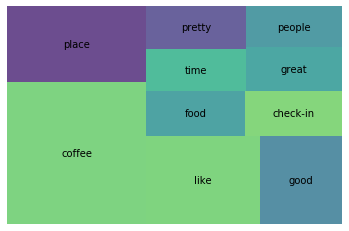

In [42]:
wc_bad_top10 = wc_bad[wc_bad['rank'] <= 10]

squarify.plot(sizes=wc_bad_top10['pct_total'], label=wc_bad_top10['word'], alpha=.8 )
plt.axis('off')
plt.show()

## Stretch Goals

* Analyze another corpus of documents - such as Indeed.com job listings ;).
* Play with the Spacy API to
 - Extract Named Entities
 - Extracting 'noun chunks'
 - Attempt Document Classification with just Spacy
 - *Note:* This [course](https://course.spacy.io/) will be of interesting in helping you with these stretch goals. 
* Try to build a plotly dash app with your text data 

